<a href="https://colab.research.google.com/github/Potsane97/python_week8/blob/main/python_week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.1 MB/s eta 0:00:00


In [ ]:
#import libraries
!pip install -U kaleido
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the data
cleaned_lines = []
with open("metadata.csv", "r", encoding="utf-8", errors="ignore") as f:
    for line in f:
        if line.count('"') % 2 == 0:  # only keep valid lines
            cleaned_lines.append(line)

with open("cleaned_file.csv", "w", encoding="utf-8") as f:
    f.writelines(cleaned_lines)

df = pd.read_csv("cleaned_file.csv")

In [ ]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


Basic data exploration

In [ ]:
# Check DataFrame dimensions
print("DataFrame shape (rows, columns):", df.shape)

DataFrame shape (rows, columns): (24522, 19)


In [ ]:
# Identify data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [ ]:
# Check missing values in all columns if needed
print("\nMissing values in all columns:")
print(df.isnull().sum())


Missing values in all columns:
cord_uid                0
sha                  3188
source_x                0
title                   0
doi                     0
pmcid                   0
pubmed_id               0
license                 0
abstract             5101
publish_time            0
authors              1173
journal               509
mag_id              24522
who_covidence_id    24522
arxiv_id            24522
pdf_json_files       3188
pmc_json_files       5275
url                     0
s2_id               24522
dtype: int64


In [ ]:
# Total missing values per column
print(df.isnull().sum())

cord_uid                0
sha                  3188
source_x                0
title                   0
doi                     0
pmcid                   0
pubmed_id               0
license                 0
abstract             5101
publish_time            0
authors              1173
journal               509
mag_id              24522
who_covidence_id    24522
arxiv_id            24522
pdf_json_files       3188
pmc_json_files       5275
url                     0
s2_id               24522
dtype: int64


In [ ]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [38]:
# Generate basic statistics for numerical columns
print(df.describe())

                        publish_time          year
count                          23574  23574.000000
mean   2017-06-09 09:18:51.585645312   2016.932383
min              1964-02-01 00:00:00   1964.000000
25%              2015-08-03 00:00:00   2015.000000
50%              2020-05-01 00:00:00   2020.000000
75%              2021-05-28 00:00:00   2021.000000
max              2021-12-14 00:00:00   2021.000000
std                              NaN      6.283852


Data Cleaning and Preparation

In [39]:
# Drop columns that are completely empty or irrelevant
cols_to_drop = ['mag_id', 'who_covidence_id', 'arxiv_id', 's2_id']
df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# Fill missing text fields with placeholders
text_fill = {
    'abstract': "No abstract",
    'authors': "Unknown authors",
    'journal': "Unknown journal",
    'sha': "No SHA",
    'pdf_json_files': "No PDF JSON",
    'pmc_json_files': "No PMC JSON"
}
for col, val in text_fill.items():
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].fillna(val)


Prepare data for analysis

In [40]:
# Convert publish_time to datetime
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce', infer_datetime_format=True)

# Extract publication year
df_cleaned['publish_year'] = df_cleaned['publish_time'].dt.year

# Optional: create abstract word count
df_cleaned['abstract_word_count'] = df_cleaned['abstract'].apply(lambda x: len(str(x).split()))


/tmp/ipython-input-1564678041.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], errors='coerce', infer_datetime_format=True)


Data Analysis and Visualization

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [42]:
# 1️⃣ Count papers by publication year
pubs_per_year = df_cleaned['publish_year'].value_counts().sort_index()
print(pubs_per_year)

publish_year
1964.0       1
1969.0       2
1970.0       3
1971.0       3
1972.0       4
1973.0       4
1974.0       7
1975.0      11
1976.0       8
1977.0      10
1978.0       6
1979.0       2
1980.0       9
1981.0       9
1982.0      11
1983.0       1
1984.0      12
1985.0       6
1986.0      13
1987.0      11
1988.0      14
1989.0      14
1990.0      19
1991.0      10
1992.0      26
1993.0      17
1994.0      18
1995.0      15
1996.0      21
1997.0      24
1998.0      28
1999.0      46
2000.0      46
2001.0      61
2002.0     281
2003.0     227
2004.0     292
2005.0     248
2006.0     302
2007.0     295
2008.0     456
2009.0     391
2010.0     416
2011.0     499
2012.0     515
2013.0     532
2014.0     581
2015.0     711
2016.0     922
2017.0     744
2018.0     859
2019.0    1459
2020.0    4020
2021.0    9332
Name: count, dtype: int64


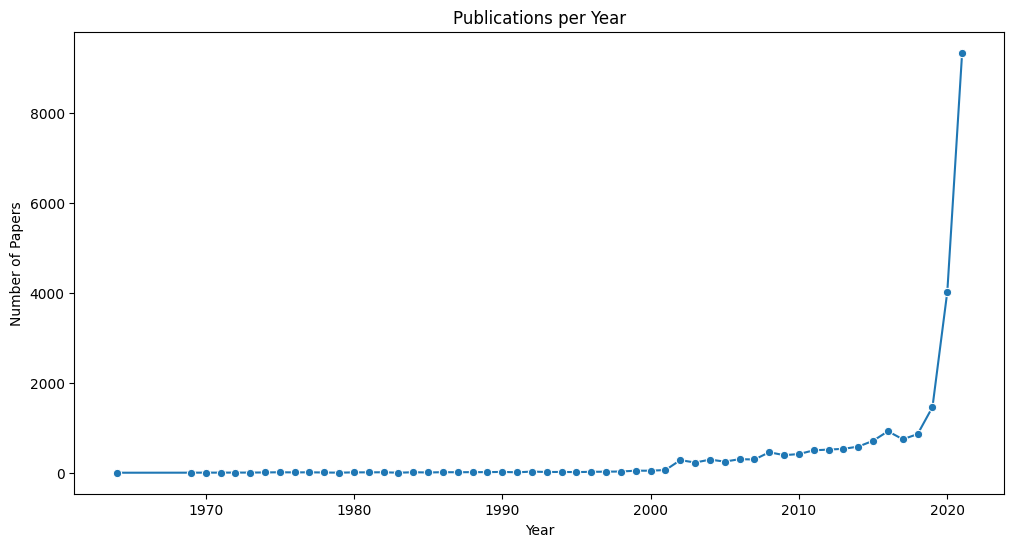

In [43]:
# Plot publications over time
plt.figure(figsize=(12,6))
sns.lineplot(x=pubs_per_year.index, y=pubs_per_year.values, marker='o')
plt.title("Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

In [44]:
# 2️⃣ Top journals publishing COVID-19 research
top_journals = df_cleaned['journal'].value_counts().head(10)
print(top_journals)

journal
PLoS One                           1107
Sci Rep                             656
Unknown journal                     509
Int J Environ Res Public Health     371
Nat Commun                          364
Lancet                              310
Intensive Care Med                  279
Viruses                             264
Int J Mol Sci                       259
BMC Infect Dis                      217
Name: count, dtype: int64


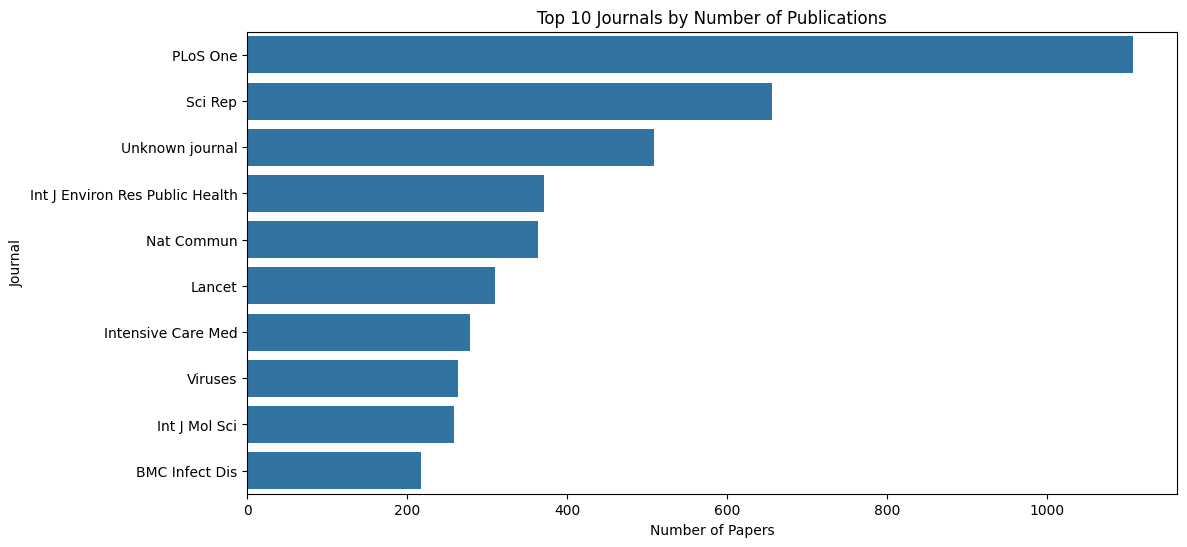

In [45]:
# Bar chart of top journals
plt.figure(figsize=(12,6))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title("Top 10 Journals by Number of Publications")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

In [46]:
# 3️⃣ Most frequent words in titles
from collections import Counter
import re

# Combine all titles
all_titles = " ".join(df_cleaned['title'].dropna().astype(str).tolist())

In [47]:
# Remove punctuation and lowercase
all_titles_clean = re.sub(r'[^\w\s]', '', all_titles.lower())
words = all_titles_clean.split()

In [48]:
# Count frequency
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)
print(most_common_words)

[('of', 17405), ('and', 12353), ('in', 12054), ('the', 9448), ('a', 7506), ('for', 4618), ('with', 3490), ('to', 3477), ('on', 2261), ('virus', 1890), ('study', 1661), ('from', 1637), ('by', 1502), ('patients', 1387), ('an', 1353), ('health', 1129), ('influenza', 1100), ('infection', 1038), ('disease', 1007), ('analysis', 996)]


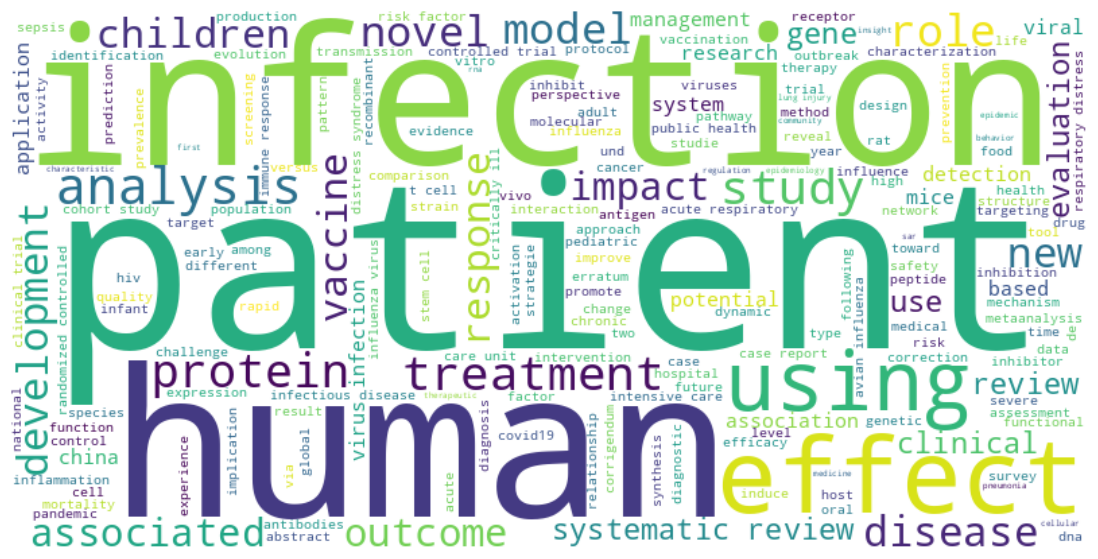

In [49]:
# Word cloud of paper titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles_clean)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

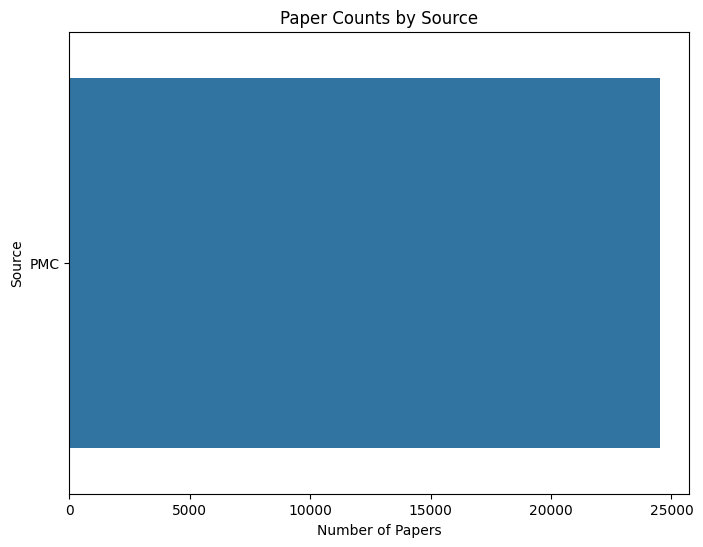

In [50]:
# 4️⃣ Distribution of paper counts by source
source_counts = df_cleaned['source_x'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("Paper Counts by Source")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.show()

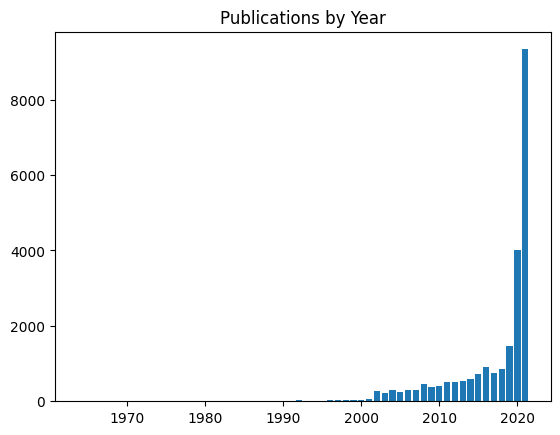

In [51]:
df['year'] = pd.to_datetime(df['publish_time']).dt.year
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Publications by Year')
plt.show()